In [1]:
%matplotlib inline

In [30]:
#result_df.to_csv('output.csv', index=False)

Bring in Dataset No.1 (Construction Confidence Dataset)

In [3]:
import pandas as pd
Construction_Confidence_All = pd.read_csv('Confidence_Indicator_IE_UK_DK.gz')
    # process chunk DF

    
#Rename the column so that when we merge it with other datasets later, it has a meaningful name

Construction_Confidence_All.columns.values[7] = 'Constr_Confidence_Value'

Construction_Confidence_All.head(10)

,DATAFLOW,LAST UPDATE,freq,indic,s_adj,geo,TIME_PERIOD,Constr_Confidence_Value,OBS_FLAG
0,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-01,-9.5,NaN
1,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-02,-14.6,NaN
2,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-03,-14.6,NaN
3,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-04,-30.9,NaN
4,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-05,-31.0,NaN
5,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-06,-31.0,NaN
6,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-07,-45.6,NaN
7,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-08,-45.6,NaN
8,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-09,-45.9,NaN
9,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-10,-45.5,NaN


Create 3 sub Confidence Dataframes for each country (IE, DK, UK) so they can be analysed individually

In [4]:
Construction_Confidence_IE = Construction_Confidence_All[Construction_Confidence_All['geo'] == 'IE'].copy()
Construction_Confidence_IE = Construction_Confidence_IE.iloc[:, [5,6, 7]]
Construction_Confidence_IE.head(2)

,geo,TIME_PERIOD,Constr_Confidence_Value
520,IE,1985-01,-35.6
521,IE,1985-02,-37.1


In [5]:
Construction_Confidence_DK = Construction_Confidence_All[Construction_Confidence_All['geo'] == 'DK'].copy()
Construction_Confidence_DK = Construction_Confidence_DK.iloc[:, [5,6, 7]]
Construction_Confidence_DK.head(2)

,geo,TIME_PERIOD,Constr_Confidence_Value
0,DK,1980-01,-9.5
1,DK,1980-02,-14.6


In [6]:
Construction_Confidence_UK = Construction_Confidence_All[Construction_Confidence_All['geo'] == 'UK'].copy()
Construction_Confidence_UK = Construction_Confidence_UK.iloc[:, [5, 6, 7]]
Construction_Confidence_UK.head(2)

,geo,TIME_PERIOD,Constr_Confidence_Value
977,UK,1980-01,-15.9
978,UK,1980-02,-16.4


Bring in Dataset No.2 (Producer Price Dataset)

In [7]:
Producer_Price_Df = pd.read_csv('producer prices or costs new residential buildings IE only.gz')
    # process chunk DF

#Rename the column so that when we merge it with other datasets later, it has a meaningful name

Producer_Price_Df.columns.values[9] = 'Producer_Price_Percent_change'

Producer_Price_Df = Producer_Price_Df.iloc[:, [7,8, 9]]
    
Producer_Price_Df.head(10)

,geo,TIME_PERIOD,Producer_Price_Percent_change
0,IE,2000-02,0.0
1,IE,2000-03,2.3
2,IE,2000-04,2.3
3,IE,2000-05,2.4
4,IE,2000-06,0.5
5,IE,2000-07,1.4
6,IE,2000-08,2.0
7,IE,2000-09,1.1
8,IE,2000-10,0.4
9,IE,2000-11,1.8


Bring in Dataset No.3 (Construction Industry Production Index)

In [8]:
Industry_Df = pd.read_csv('Industry Production Index IE DK UK- monthly data.gz')
    # process chunk DF

#Rename the column so that when we merge it with other datasets later, it has a meaningful name

Industry_Df.columns.values[9] = 'Industry_Prod_index'

Industry_Df = Industry_Df.iloc[:, [7,8, 9]]
   
Industry_Df.head(10)

,geo,TIME_PERIOD,Industry_Prod_index
0,DK,2000-01,102.6
1,DK,2000-02,102.2
2,DK,2000-03,104.4
3,DK,2000-04,103.9
4,DK,2000-05,107.5
5,DK,2000-06,105.4
6,DK,2000-07,103.7
7,DK,2000-08,107.2
8,DK,2000-09,104.3
9,DK,2000-10,106.6


Create 3 sub Industry for each country (IE, DK, UK) so they can be analysed individually

In [9]:
Industry_Df_IE = Industry_Df[Industry_Df['geo'] == 'IE'].copy()
Industry_Df_IE.head(2)



,geo,TIME_PERIOD,Industry_Prod_index
278,IE,1980-01,7.8
279,IE,1980-02,7.5


In [10]:
Industry_Df_DK = Industry_Df[Industry_Df['geo'] == 'DK'].copy()
Industry_Df_DK.head(2)

,geo,TIME_PERIOD,Industry_Prod_index
0,DK,2000-01,102.6
1,DK,2000-02,102.2


In [11]:
Industry_Df_UK = Industry_Df[Industry_Df['geo'] == 'UK'].copy()
Industry_Df_UK.head(2)

,geo,TIME_PERIOD,Industry_Prod_index
797,UK,1998-01,101.2
798,UK,1998-02,100.4


Bring in Dataset No.4 (Employment expectations)

In [12]:
Employment_Df = pd.read_csv('Employment Expectations IE DK.gz')
    # process chunk DF

#Rename the column so that when we merge it with other datasets later, it has a meaningful name

Employment_Df.columns.values[8] = 'Employment_Expectation_Score'

Employment_Df = Employment_Df.iloc[:, [6,7,8]]
    
Employment_Df.head(10)

,geo,TIME_PERIOD,Employment_Expectation_Score
0,DK,2022-05,-4.0
1,DK,2022-06,-7.2
2,DK,2022-07,-10.1
3,DK,2022-08,-10.4
4,DK,2022-09,-12.3
5,DK,2022-10,-14.2
6,DK,2022-11,-14.2
7,DK,2022-12,-13.6
8,DK,2023-01,-13.7
9,DK,2023-02,-15.3


In [13]:
Employment_Df_IE = Employment_Df[Employment_Df['geo'] == 'IE'].copy()
Employment_Df_IE.head(2)

,geo,TIME_PERIOD,Employment_Expectation_Score
12,IE,2022-05,11.5
13,IE,2022-06,14.9


In [14]:
Employment_Df_DK = Employment_Df[Employment_Df['geo'] == 'DK'].copy()
Employment_Df_DK.head(2)

,geo,TIME_PERIOD,Employment_Expectation_Score
0,DK,2022-05,-4.0
1,DK,2022-06,-7.2


Bring in Dataset No.5 (Construction_Cost_index Dataset)

In [15]:
Construction_Cost_index = pd.read_csv('national_house_construction_cost_index.csv')

In [16]:
Construction_Cost_index.head(15)

,Unnamed: 0,NATIONAL HOUSE CONSTRUCTION COST INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Base: January 1991 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
5,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
6,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
7,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
8,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
9,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN


Prepare the 5th dataset for the melt function

In [17]:
# Delete the first row and the yearly average row
Construction_Cost_index = Construction_Cost_index.iloc[1:14]


# Reset the headers
Construction_Cost_index.columns = Construction_Cost_index.iloc[0]
Construction_Cost_index = Construction_Cost_index[1:].reset_index(drop=True)

Construction_Cost_index.head(15)

1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
5,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
6,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
7,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN
8,September,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
9,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN


In [18]:
# Define a dictionary to map month names to numeric values
month_dict = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}


# Reshape the dataset
Construction_Cost_index_melted = Construction_Cost_index.melt(
    id_vars='Month',
    var_name='Year',
    value_name='Data'
)

# Map month names to numeric values
Construction_Cost_index_melted['Month'] = Construction_Cost_index_melted['Month'].map(month_dict)

# Concatenate 'Year' and 'Month' columns
Construction_Cost_index_melted['Year'] = Construction_Cost_index_melted['Year'].astype(str)
Construction_Cost_index_melted['Month'] = Construction_Cost_index_melted['Month'].astype(str)
Construction_Cost_index_melted['TIME_PERIOD'] = Construction_Cost_index_melted['Year'] + '-' + Construction_Cost_index_melted['Month']

# Reorder columns
Construction_Cost_index_melted = Construction_Cost_index_melted[['TIME_PERIOD', 'Data']]

# Reset index
Construction_Cost_index_melted = Construction_Cost_index_melted.reset_index(drop=True)



In [19]:
#Rename the column so that when we merge it with other datasets later, it has a meaningful name

Construction_Cost_index_melted.columns.values[1] = 'Construction_cost_index'
Construction_Cost_index_melted['Construction_cost_index'] = Construction_Cost_index_melted['Construction_cost_index'].astype(float)
Construction_Cost_index_melted.head(3)


,TIME_PERIOD,Construction_cost_index
0,1994-01,109.2
1,1994-02,109.3
2,1994-03,109.4


Merge the IE datasets together

In [20]:
merged_df = pd.merge(Construction_Confidence_IE, Producer_Price_Df, on=['TIME_PERIOD', 'geo'], how='outer')

merged_df = pd.merge(merged_df, Industry_Df_IE, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Employment_Df_IE, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Construction_Cost_index_melted, on=['TIME_PERIOD'], how='outer')

merged_df.head(5)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Construction_cost_index
0,IE,1985-01,-35.6,NaN,9.7,NaN,NaN
1,IE,1985-02,-37.1,NaN,9.6,NaN,NaN
2,IE,1985-03,-35.3,NaN,10.1,NaN,NaN
3,IE,1985-04,-29.2,NaN,9.7,NaN,NaN
4,IE,1985-05,-30.0,NaN,9.6,NaN,NaN


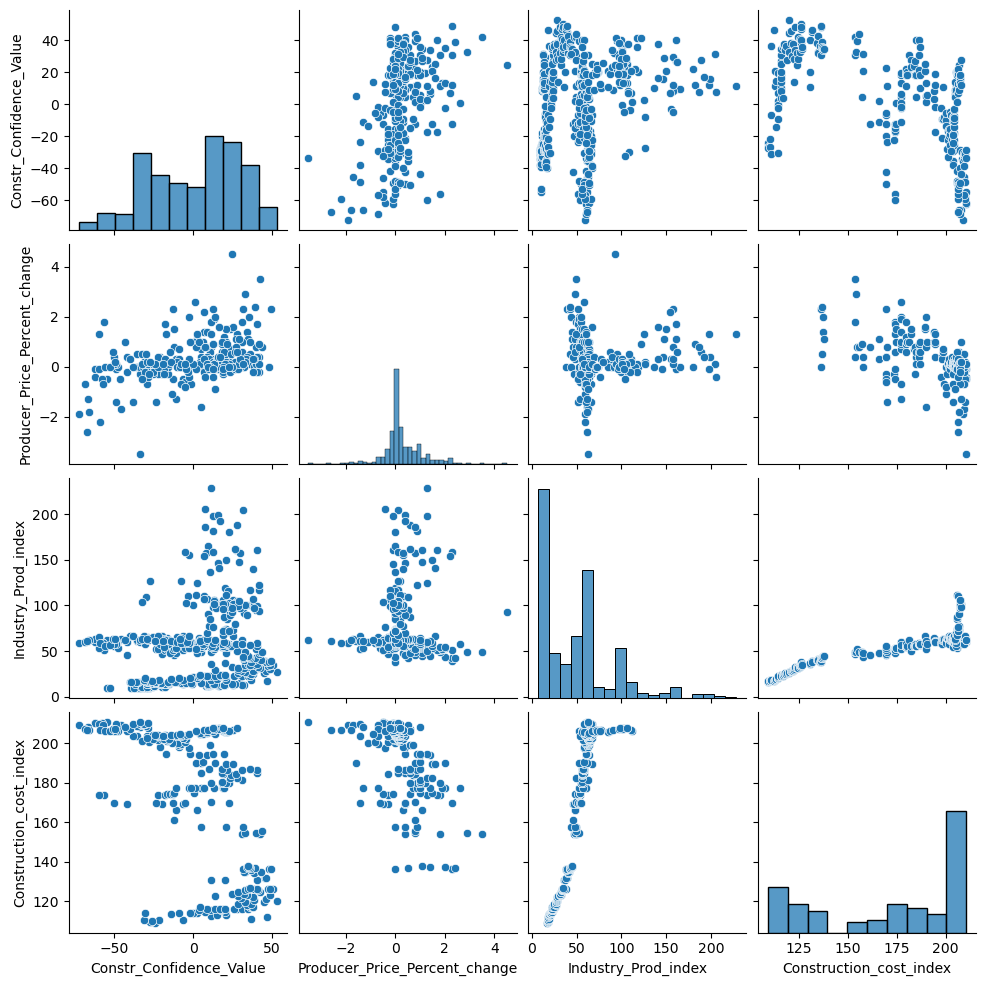

In [21]:
import seaborn as sns
# Specify the columns to include in the pairplot
columns_to_plot = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index','Construction_cost_index' ]

# Extract the columns to plot as a separate dataframe
data_to_plot = merged_df[columns_to_plot]

# Create the pairplot
sns.pairplot(data_to_plot)

In [22]:
df = merged_df.iloc[181:457]

df.tail(10)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Construction_cost_index
447,IE,2022-04,16.6,1.6,140.7,NaN,NaN
448,IE,2022-05,12.4,0.9,182.0,11.5,NaN
449,IE,2022-06,11.3,1.3,228.4,14.9,NaN
450,IE,2022-07,7.0,2.2,154.5,11.2,NaN
451,IE,2022-08,12.4,-0.1,198.0,18.9,NaN
452,IE,2022-09,7.7,-0.4,205.7,14.3,NaN
453,IE,2022-10,7.7,0.8,186.3,13.3,NaN
454,IE,2022-11,15.8,0.4,199.0,26.4,NaN
455,IE,2022-12,22.3,0.0,180.4,22.6,NaN
456,IE,2023-01,17.0,0.4,192.0,23.2,NaN


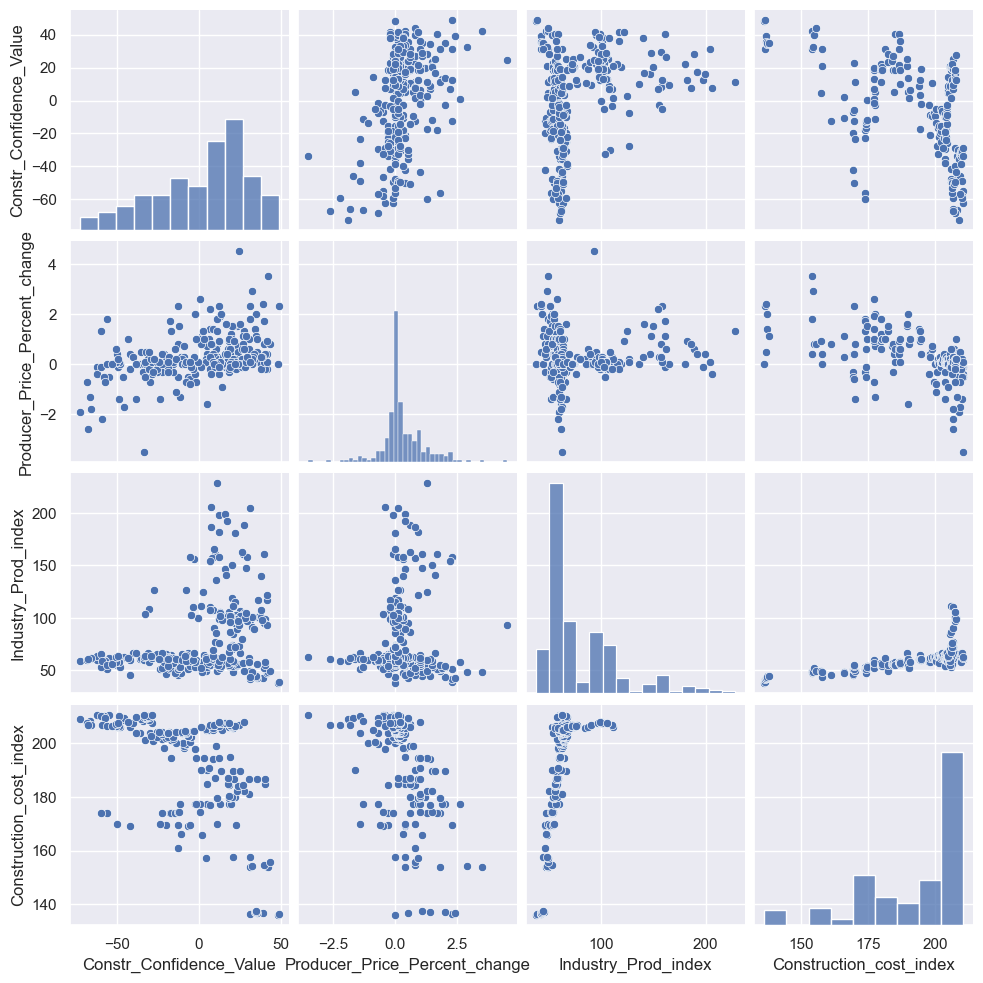

In [27]:
import seaborn as sns
# Specify the columns to include in the pairplot
columns_to_plot = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index','Construction_cost_index' ]

# Extract the columns to plot as a separate dataframe
data_to_plot = df[columns_to_plot]
sns.set(context="notebook")
# Create the pairplot
sns.pairplot(data_to_plot)

In [39]:
columns_to_change = ['Constr_Confidence_Value', 'Industry_Prod_index', 'Construction_cost_index']

# Calculate the percentage increase for selected columns
percentage_increase_df = merged_df[columns_to_change].pct_change() * -100

# Combine the percentage increase dataframe with the unchanged column
result_df = pd.concat([merged_df['Producer_Price_Percent_change'], percentage_increase_df], axis=1)
result_df = pd.concat([merged_df['TIME_PERIOD'], result_df], axis=1)
result_df = pd.concat([merged_df['geo'], result_df], axis=1)

In [40]:
result_df.head(10)

,geo,TIME_PERIOD,Producer_Price_Percent_change,Constr_Confidence_Value,Industry_Prod_index,Construction_cost_index
0,IE,1985-01,NaN,NaN,NaN,NaN
1,IE,1985-02,NaN,-4.213483,1.030928,NaN
2,IE,1985-03,NaN,4.851752,-5.208333,NaN
3,IE,1985-04,NaN,17.280453,3.960396,NaN
4,IE,1985-05,NaN,-2.739726,1.030928,NaN
5,IE,1985-06,NaN,-0.000000,2.083333,NaN
6,IE,1985-07,NaN,1.000000,-1.063830,NaN
7,IE,1985-08,NaN,6.060606,3.157895,NaN
8,IE,1985-09,NaN,-3.225806,-3.260870,NaN
9,IE,1985-10,NaN,-10.069444,1.052632,NaN


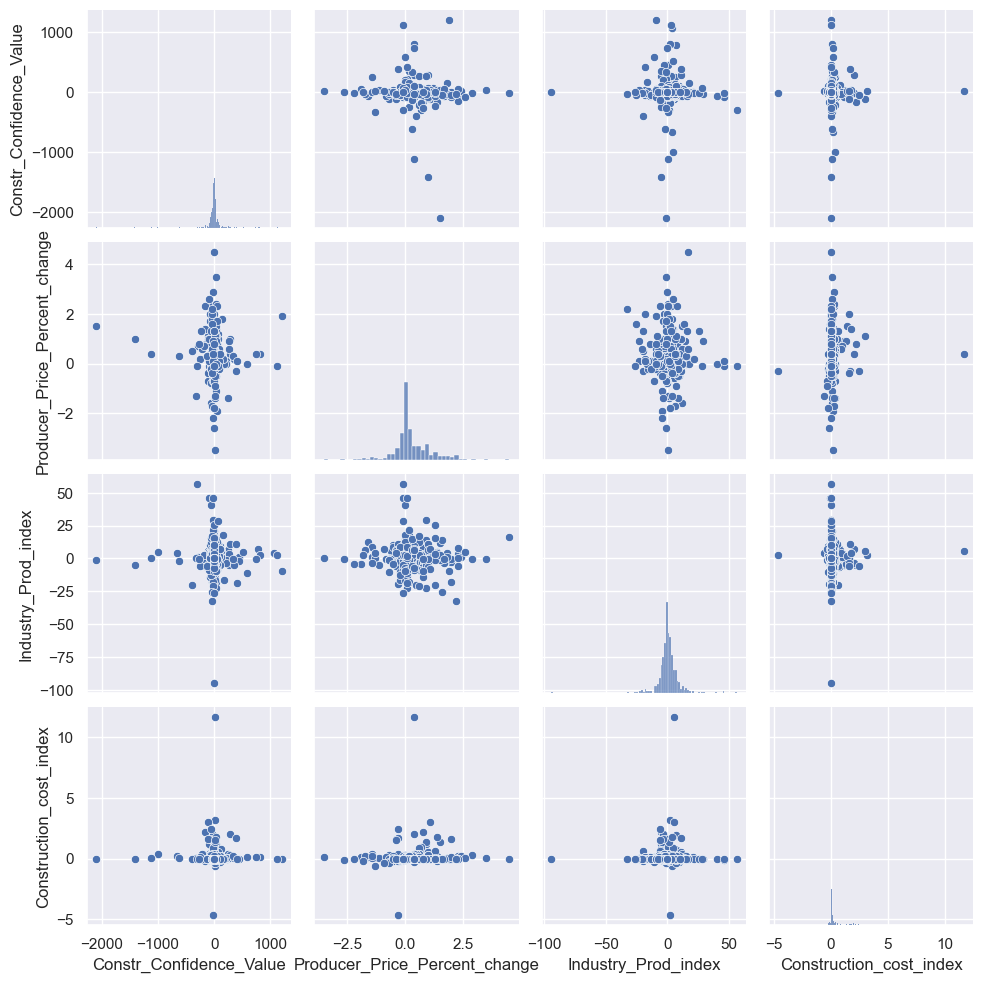

In [36]:
import seaborn as sns
# Specify the columns to include in the pairplot
columns_to_plot = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index','Construction_cost_index' ]

# Extract the columns to plot as a separate dataframe
data_to_plot = result_df[columns_to_plot]
sns.set(context="notebook")
# Create the pairplot
sns.pairplot(data_to_plot)

In [26]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index', 'Employment_Expectation_Score']

# Extract the columns to be scaled as a separate dataframe
data_to_scale = merged_df[columns_to_scale]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)